Primeiro carregue a imagem para o notebook.

Depois instale as bibliotecas que não são nativas do Google Colab

In [16]:
#instalando as bibliotecas não nativas

!pip install gdal
!pip install rasterio
!pip install spectral

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 212 kB 24.7 MB/s 


**TIFFFILE** e **MATPLOTLIB**

Biblioteca para a leitura e visualização da imagem. É maneira mais simples, que requer menos código para a leitura e visualização.

Lê somente arquivos TIFF

É uma biblioteca nativa, por isso não precisa ser instalada. Só é preciso importa-la

***Vc perde informações como as coordenadas***

In [17]:
# importa a biblioteca tifffile e a "apelida" de tif, para ficar mais simples de chama-la no programa
import tifffile as tif 

# importa a biblioteca matplotlib.pyplot, especificamente o método pyplot, que plota a imagem
import matplotlib.pyplot as plt

# importar somente o método imgshow da biblioteca spectral
from spectral import imshow 

In [3]:
# img será a variavél que receberá a imagem
# .imread é o método da biblioteca tif, que recebe como argumento '( )' o endereço da imagem
# para pegar o caminho da imagem va até ela, e nos 3 pontinhos clique em "copiar o caminho"
# o caminho deve ser colocado entre '' pois é uma string

img = tif.imread('/content/EV_2020.tif')

In [8]:
print(img)

[[-3.4028235e+38 -3.4028235e+38 -3.4028235e+38 ... -3.4028235e+38
  -3.4028235e+38 -3.4028235e+38]
 [-3.4028235e+38 -3.4028235e+38 -3.4028235e+38 ... -3.4028235e+38
  -3.4028235e+38 -3.4028235e+38]
 [-3.4028235e+38 -3.4028235e+38 -3.4028235e+38 ... -3.4028235e+38
  -3.4028235e+38 -3.4028235e+38]
 ...
 [-3.4028235e+38 -3.4028235e+38 -3.4028235e+38 ... -3.4028235e+38
  -3.4028235e+38 -3.4028235e+38]
 [-3.4028235e+38 -3.4028235e+38 -3.4028235e+38 ... -3.4028235e+38
  -3.4028235e+38 -3.4028235e+38]
 [-3.4028235e+38 -3.4028235e+38 -3.4028235e+38 ... -3.4028235e+38
  -3.4028235e+38 -3.4028235e+38]]


In [9]:
#mostra a quantidade de linhas, colunas e bandas(se tiver mais de uma)
img.shape

(573, 804)

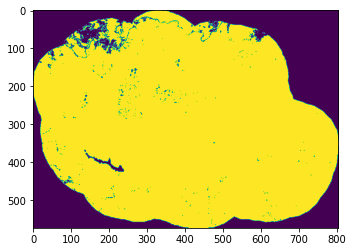

In [10]:
# o plt não permite plotar mais de uma por vez, ou seja, não dá pra fazer composição colorida.
# plotando cada banda por vez
# .imshow é o método do plt para visualização de imagens
plt.imshow(img)

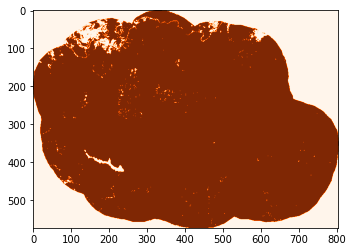

In [15]:
# com cmap = 'Greys_r' passo a imagem para a escala de cor cinza reversa
plt.imshow( img, cmap = 'Oranges')

A imagem que utilizei foi o EV_2020. Não mostrou a as classes corretamente. Ficou tudo da mesma cor

In [ ]:
# o imshow sozinho é da biblioteca spectral
# a spetral permite plotar mais de uma banda, ou seja, dá pra fazer composições coloridas
imshow(img)

# GDAL
agora estou usando a imagem A_comp_128A4.tif que está dentro da pasta composições, em imagens da Pesquisa 

In [31]:
from osgeo import gdal 
import numpy as np


In [19]:
img2 = gdal.Open('/content/A_comp_128A4.tif')

In [20]:
# não reconhe o arquivo como  estrutura do numpy, um array (matriz)
print(img2)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f7e92ab4ea0> >


In [23]:
# cria-se então uma variável que vai receber a transformação para array da variável que carrega a imagem
img3 = img2.ReadAsArray()

ImageView object:
  Display bands       :  [0, 402.0, 803]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 2911.0]
    G: [0.0, 4593.0]
    B: [0.0, 1889.0]

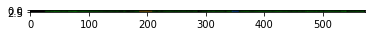

In [24]:
imshow(img3)

Percebe-se que foi plotado algo, mas que não corresponde a imagem. 

A verdade é que a estrutura é diferente. Quando utilizamos o .shape (nesse caso img3.shape) vemos que temos as bandas, depois as linhas e depois as colunas. Quando normalmente temos linhas, colunas e bandas.

Então é preciso manipular

In [25]:
img3.shape

(3, 573, 804)

trocar as dimensões. Lembrando que em python os índices começam em zero. Então, não é (1,2,3) e sim (0,1,2)

o swapaxes da numpy troca dimensões. Aqui trocaremos as bandas(0) pelas colunas (2). 

E depois trocar as colunas (que viraram 0) pelas linhas (1)

In [26]:
img3 = img3.swapaxes(0,2)
img3 = img3.swapaxes(0,1)

ImageView object:
  Display bands       :  [0, 1, 2]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 3891.0]
    G: [0.0, 6023.0]
    B: [0.0, 3124.0]

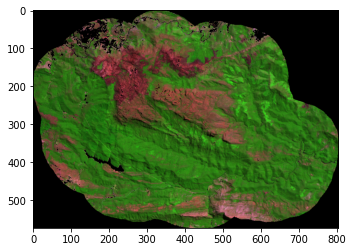

In [27]:
imshow(img3)

ImageView object:
  Display bands       :  (2, 1, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 3124.0]
    G: [0.0, 6023.0]
    B: [0.0, 3891.0]

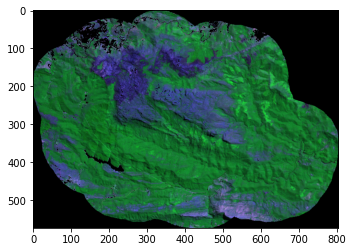

In [28]:
# alternando a composição colorida
imshow(img3,(2,1,0))

Uma outra forma de inverter a ordem das bandas, linhas e colunas, ou seja, de transformar para um numpy array é:

- ler as bandas de forma separada 

- converter uma a uma para numpy array 

- empilhar novamente 


In [33]:

# o Gdal não segue a lógica do python, e começa a contagem por 1 mesmo e não por 0
b1 = img2.GetRasterBand(1).ReadAsArray()
b2 = img2.GetRasterBand(2).ReadAsArray()
b3 = img2.GetRasterBand(3).ReadAsArray()

In [34]:
# empilhamento
stack = np.dstack([b1,b2,b3])

In [36]:
#visualizar a estrutura
stack.shape
# agora as está na ordem certa

(573, 804, 3)

ImageView object:
  Display bands       :  (0, 1, 2)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 3891.0]
    G: [0.0, 6023.0]
    B: [0.0, 3124.0]

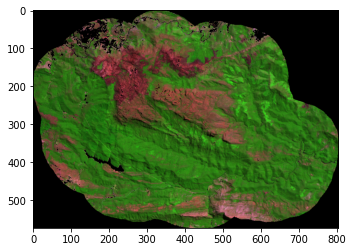

In [37]:
imshow(stack, (0,1,2)) # aqui voltamnos para a lógica de contagem do python que começa em 0

Como houve a conversão para numpy array, perde-se informações como coordenadas igual no tiffile

# Rasterio


In [41]:
import rasterio
from rasterio.plot import show

In [39]:
rst = rasterio.open('/content/A_comp_128A4.tif')

In [40]:
print(rst)

<open DatasetReader name='/content/A_comp_128A4.tif' mode='r'>


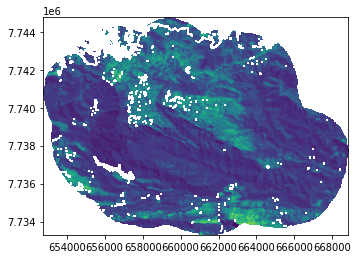

In [42]:
show(rst)

Transformar da estrutura da rasterio para numpy array

In [48]:
b1 = rst.read(1)
b2 = rst.read(2)
b3 = rst.read(3)

In [49]:
stack = np.dstack([b1,b2,b3])

ImageView object:
  Display bands       :  (0, 1, 2)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 3891.0]
    G: [0.0, 6023.0]
    B: [0.0, 3124.0]

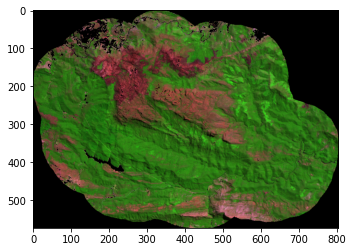

In [50]:
imshow(stack, (0,1,2))

Maneira muito utilizada, quase uma convenção do pessoal que utiliza rasterio:

In [53]:
with rasterio.open('/content/A_comp_128A4.tif') as rst:
  b1 = rst.read(1)
  b2 = rst.read(2)
  b3 = rst.read(3)

stack2 = np.dstack([b1,b2,b3])

ImageView object:
  Display bands       :  (0, 1, 2)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 3891.0]
    G: [0.0, 6023.0]
    B: [0.0, 3124.0]

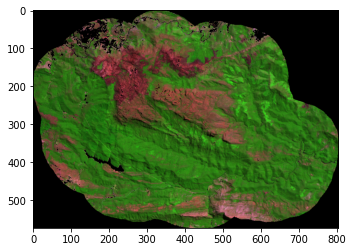

In [54]:
imshow(stack2, (0,1,2))

Quando utilizou, para o Rasterio, o show, tem-se apenas a plotagem de uma imagem, numa escala colorida pré definida, porém, que mostra as coordenadas.
É possível utilizar o show para fazer uma composição colorida, definindo a ordem das bandas? Isso economizaria a técnica do with e preservaria as coordenadas, certo?